In [123]:
# Importando bibliotecas que serão utilizidas
import os
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [124]:
# Manipulando diretorios 
PATH_DIR = os.getcwd()
DATA_DIR = os.path.join(PATH_DIR, "..", "output")

DATA_PATH = None

In [125]:
# Encontrando dados do Brasil
for name in os.listdir(DATA_DIR):
  if name == "data_brazil_2021.csv":
    DATA_PATH = os.path.join(DATA_DIR, name)

DATA_PATH

'c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\output\\data_brazil_2021.csv'

In [126]:
# Carregando dados
df = pd.read_csv(DATA_PATH, sep=";", encoding="utf-8")
df = df.drop(columns=["Unnamed: 0"])

In [127]:
# Enxergando o head
df.head()

,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,2021-01-01,53,7700578,24605,195411,462,6747065,733959
1,2021-01-02,53,7716405,15827,195725,314,6756284,748883
2,2021-01-03,1,7733746,17341,196018,293,6769420,751260
3,2021-01-04,1,7753752,20006,196561,543,6813008,724720
4,2021-01-05,1,7810400,56648,197732,1171,6875230,681961


#### Limpeza e organização da base

In [128]:
# Criando um dataframe para separar novos casos e obitos por semana de EPI 
df_cases_and_deads = df.drop(columns=["casosAcumulado", "Recuperadosnovos","emAcompanhamentoNovos", "data", "obitosAcumulado"] ).groupby("semanaEpi").sum()

> Fiz isso para que seja mais visivel o gráfico de novos casos e óbitos

In [129]:
# enxergando a tabela
df_cases_and_deads.head()

,casosNovos,obitosNovos
semanaEpi,,
1,359593,6906
2,379061,6665
3,361195,7149
4,360721,7500
5,320820,7067


#### Análise Exploratória de Dados

##### Análise descritiva

In [141]:
# Analisando o compotamento das variáveis
df.drop(columns=["data", "semanaEpi"]).describe().iloc[1:].round(2)

,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
mean,17000494.83,40031.64,464251.65,1161.94,15783165.44,715522.90
std,4776357.02,28463.23,146219.69,951.46,4928408.18,386762.71
min,7700578.00,-573.00,195411.00,24.00,6747065.00,68156.00
25%,12910082.00,13957.00,328206.00,389.00,11239099.00,359523.00
50%,18687469.00,34339.00,521952.00,962.00,16931272.00,791923.00
75%,21445651.00,64025.00,597255.00,1641.00,20432643.00,1076873.00
max,22287521.00,150106.00,619056.00,4249.00,21584402.00,1317658.00


> - Em 21/09/21 houve uma revisão no estado do Ceará e diminuiram 12 mil casos, por isso o minimo é -573
> - Podemos ver que novos casos e óbitos variam muito em relação média, pois a dispersão padrão é muito alto
> - Como casosAcumulado é crescente, então podemos dizer que: 25% é o primeiro trimestre de 2021, 25% a 50% é o segundo trimestre do mesmo ano e assim por diante. Com isso, se formos observar o número de casos de cada trimeste ficaria dessa forma:
>   - 1° Trimestre: 5.209.504 casos
>   - 2º Trimestre: 5.777.387 casos
>   - 3° Trimestre: 2.758.182 casos
>   - 4° Trimestre: 841.870 casos
> - Ou seja, o pico da COVID-19 em 2021 no Brasil foi o 1° semestre

##### Análise uniunidimensional

Casos acumulados

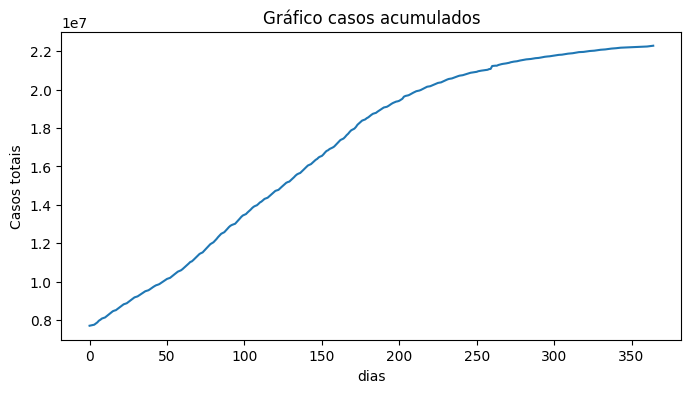

In [133]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["casosAcumulado"])

plt.title("Gráfico casos acumulados")
plt.ylabel("Casos totais")
plt.xlabel("dias")

plt.show()

Novos Casos

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]


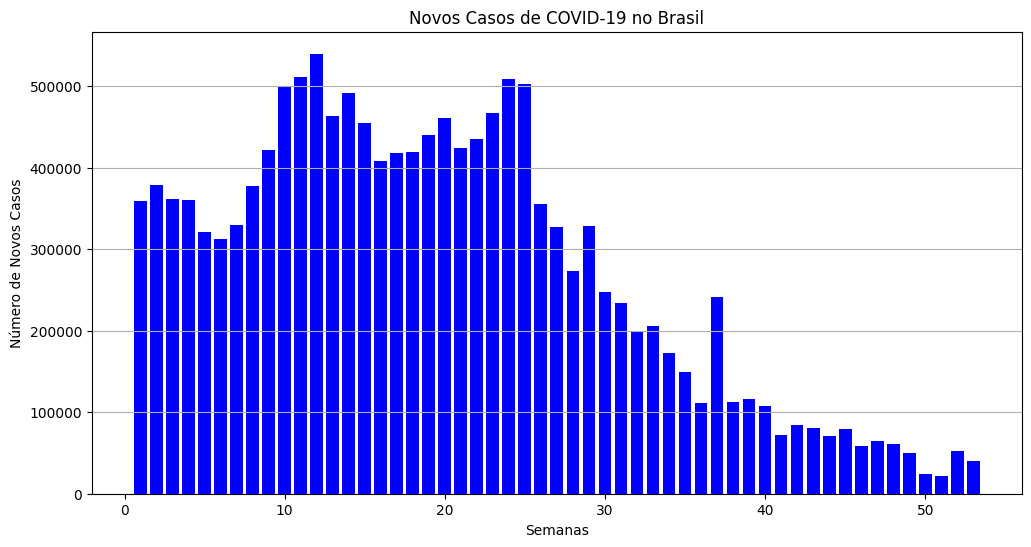

In [142]:
plt.figure(figsize=(12, 6))
plt.bar(df_cases_and_deads.index.values, df_cases_and_deads['casosNovos'], color='b')
plt.title('Novos Casos de COVID-19 no Brasil')
plt.xlabel('Semanas')
plt.ylabel('Número de Novos Casos')
plt.grid(axis='y')
plt.show()

> 
> - 18/09/21 houve uma revisão no estado do Rio de Janeiro e foram incluidos registros antigos. Com isso houve uma super aumento no número de dados para 150mil
> - A maioria das segundas e domingos tem número de casos reduzidos, isso acontece pois não registravam todos os casos no final de semana, assim, deixando para depois
> - O carnaval de 2021 no Brasil foi na semana EPI 7, pode-se ver que antes dessa semana estava em queda o números de casos, mas logo após ela, os casos aumentaram bastante

Óbitos acumulados

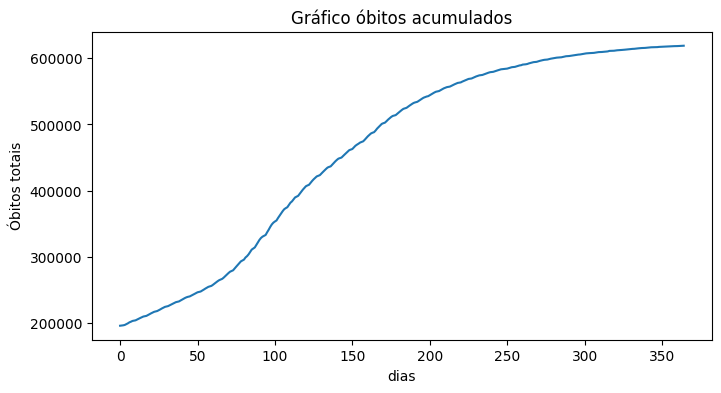

In [135]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["obitosAcumulado"])

plt.title("Gráfico óbitos acumulados")
plt.ylabel("Óbitos totais")
plt.xlabel("dias")

plt.show()

Novos Óbitos

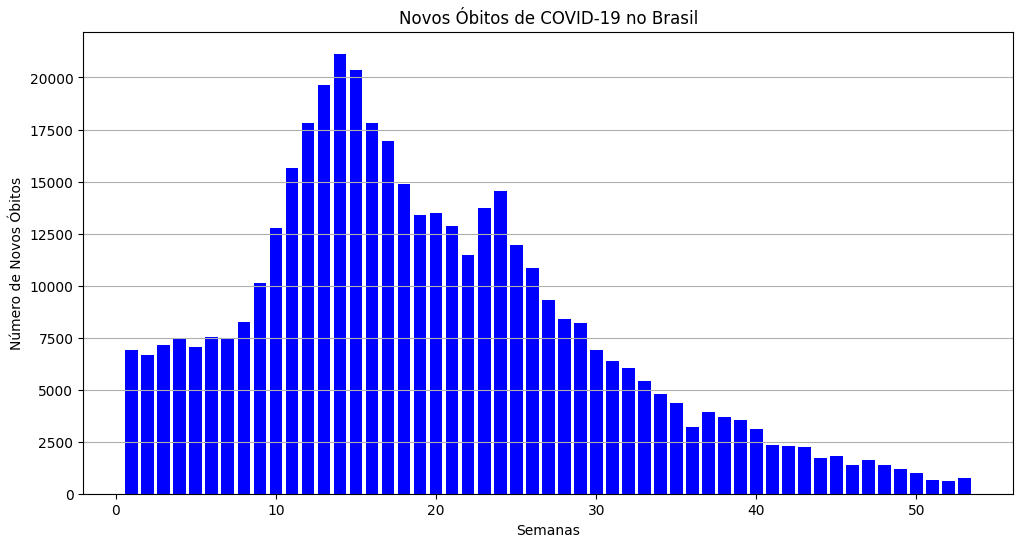

In [136]:
plt.figure(figsize=(12, 6))
plt.bar(df_cases_and_deads.index.values, df_cases_and_deads['obitosNovos'], color='b')
plt.title('Novos Óbitos de COVID-19 no Brasil')
plt.xlabel('Semanas')
plt.ylabel('Número de Novos Óbitos')
plt.grid(axis='y')
plt.show()

> - 13/11/21 revisão de dados em São Paulo
> 

Novos Recuperados

Text(0.5, 0, 'dias')

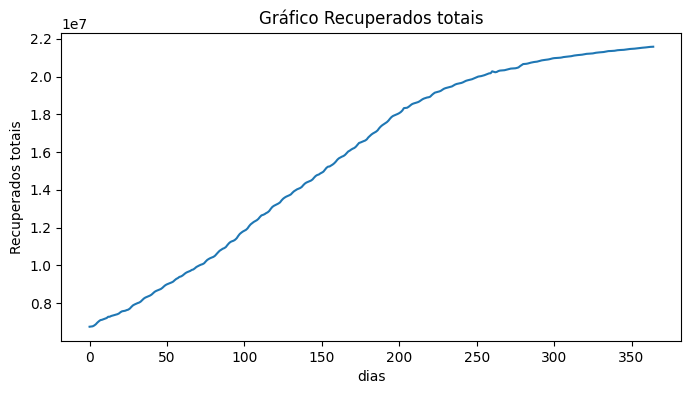

In [145]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["Recuperadosnovos"])

plt.title("Gráfico Recuperados totais")
plt.ylabel("Recuperados totais")
plt.xlabel("dias")


Novos em Acompanhamento

Text(0.5, 0, 'dias')

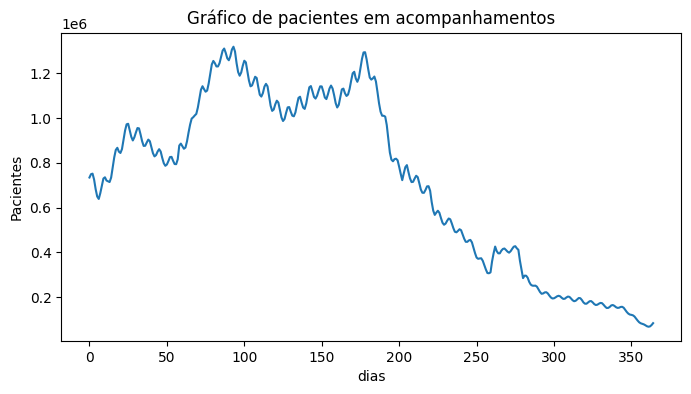

In [144]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df.index.values, df["emAcompanhamentoNovos"])

plt.title("Gráfico de pacientes em acompanhamentos")
plt.ylabel("Pacientes")
plt.xlabel("dias")

##### Análise Bivariada/Multivariada

Novos casos x Obitos novos

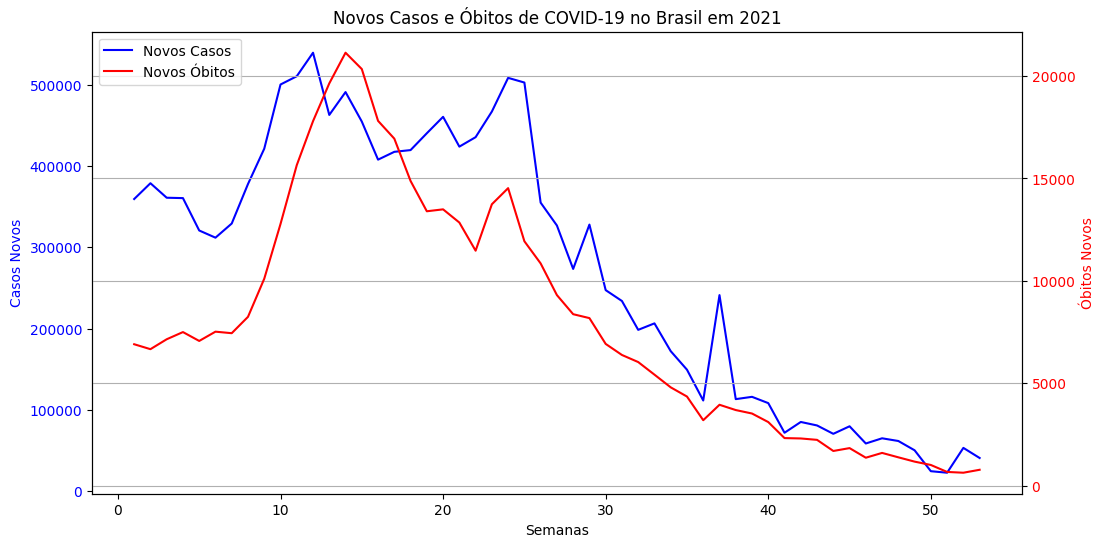

In [147]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Semanas')
ax1.set_ylabel('Casos Novos', color='b')
ax1.tick_params(axis='y', labelcolor='b')
line_cases = (ax1.plot(df_cases_and_deads.index.values, df_cases_and_deads['casosNovos'], color='b', label='Novos Casos'))[0]

ax2 = ax1.twinx()
ax2.set_ylabel('Óbitos Novos', color='r')
ax2.tick_params(axis='y', labelcolor='r')
line_deads = (ax2.plot(df_cases_and_deads.index.values, df_cases_and_deads['obitosNovos'], color='r', label='Novos Óbitos'))[0]

lines = [line_cases, line_deads]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.title('Novos Casos e Óbitos de COVID-19 no Brasil em 2021')

plt.grid(True)
plt.show()



> - Pode-se ver que os gráficos tem certa semelhança, a partir que o numero de casos tem um crescimento ou uma diminuição, logo depois o número de óbitos também irá ter.

Casos acumulados x Óbitos acumulados

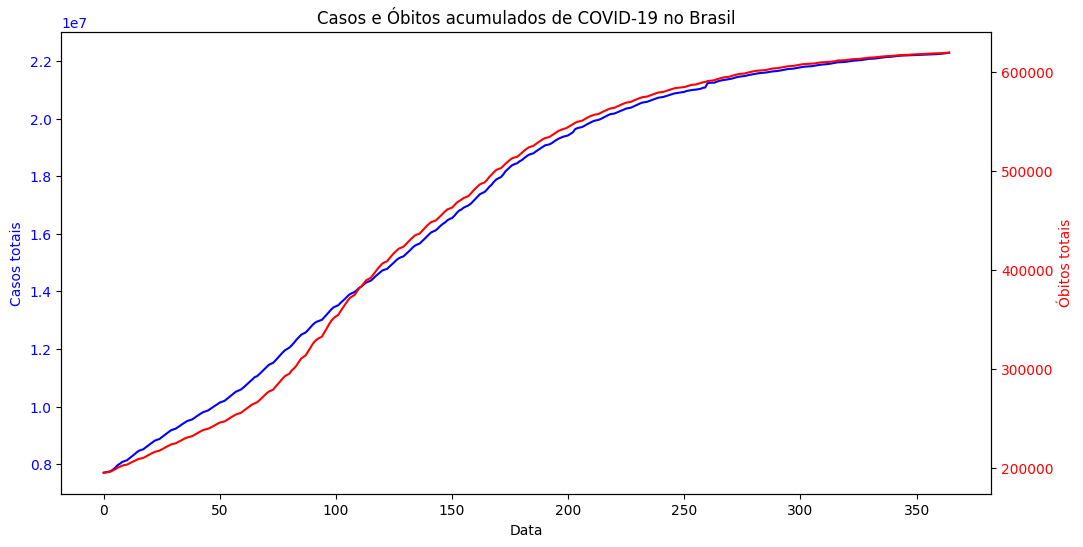

In [140]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Data')
ax1.set_ylabel('Casos totais', color='b')
ax1.plot(df.index.values, df['casosAcumulado'], color='b', label='Casos totais')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.set_ylabel('Óbitos totais', color='r')
ax2.plot(df.index.values, df['obitosAcumulado'], color='r', label='Óbitos totais')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Casos e Óbitos acumulados de COVID-19 no Brasil')

plt.show()

> - Mais uma prova que o gráfico de óbitos acompanha o gráfico de casos